# Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
import warnings
warnings.filterwarnings("ignore")

## Importing all datasets

In [2]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [3]:
summer.head(4) # Checking first 4 rows of our summer data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold


In [4]:
summer.shape  # Checking num of rows and columns of summer data

(31165, 9)

In [5]:
winter.head(4) # Checking first 4 rows of our winter data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze


In [6]:
winter.shape    # Checking num of rows and columns of winter data

(5770, 9)

In [7]:
dic.head(3)   

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232


## Concatenating and merging 

In [8]:
Olympics =pd.concat([summer,winter],axis =0,keys=["Summer","Winter"],names=["Editions"]).reset_index()

In [9]:
Olympics

,Editions,level_1,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [10]:
Olympics.drop(columns="level_1",inplace=True,axis=1)


In [11]:
Olympics

,Editions,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [12]:
Olympics = Olympics.merge(dic.iloc[:,:2],how="left",left_on="Country",right_on="Code").drop(columns=["Code"])

In [13]:
Olympics

,Editions,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


# Data Cleaning 

In [14]:
Olympics.rename(columns={"Country_x":"Code","Country_y":"Country"},inplace = True)

In [15]:
Olympics  # As we can see we rename country_x to code and country_y to country sucessfully

,Editions,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [16]:
dic.rename(columns={"GDP per Capita":"GDP"},inplace=True) # Because of some white space I rename GDP per Capita CO to GDP.
dic.head(2)

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582


In [17]:
Olympics.info() # As we can see we have null values in Country column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Editions    36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [18]:
Missing_Country = Olympics.loc[Olympics.Country.isnull()] # Checking missing country rows
Missing_Country

,Editions,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [19]:
Missing_Country_index = Olympics.loc[Olympics.Country.isnull()].index  
Missing_Country_index

Int64Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,
              260,
            ...
            33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979,
            33980],
           dtype='int64', length=6367)

In [20]:
Olympics.loc[Olympics.Country.isnull()].Code.value_counts()

URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

In [21]:
missing_Code_index=Olympics.loc[Olympics.Country.isnull()].Code.value_counts().index
missing_Code_index

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object')

In [22]:
mapper = pd.Series(index=missing_Code_index, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [23]:
mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [24]:
Olympics.Country.fillna(Olympics.Code.map(mapper),inplace=True)

In [25]:
Olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Editions    36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [26]:
Olympics[Olympics.Country.isnull()]  

,Editions,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


<ul> As we can see above we have still 4 rows are blank in country column and even we dont have Code for thess blank country so its good to remove these 4 rows<ul> 

In [27]:
Olympics.dropna(subset=["Code"],inplace=True)

In [28]:
Olympics.info()  # Sucessfully removed those 4 rows where country and code both are unknown

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Editions    36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


<ul> <b> Note:</b> If you see above Index showing 0 to 36934 it must be 0 to 36930 because now we have only 36931 rows. <ul>

In [29]:
Olympics.reset_index(drop=True,inplace=True)
Olympics.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Editions    36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [30]:
Olympics.nunique()

Editions          2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

<ul><b> Note: </b> Giving order to medal column we need to change its datatype object to categorial so that we can change it easily.<ul> 

In [31]:
Olympics["Medal"] =Olympics.Medal.astype("category")
Olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Editions    36931 non-null  object  
 1   Year        36931 non-null  int64   
 2   City        36931 non-null  object  
 3   Sport       36931 non-null  object  
 4   Discipline  36931 non-null  object  
 5   Athlete     36931 non-null  object  
 6   Code        36931 non-null  object  
 7   Gender      36931 non-null  object  
 8   Event       36931 non-null  object  
 9   Medal       36931 non-null  category
 10  Country     36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.9+ MB


In [32]:
Olympics.Medal.sort_values()

36930    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

In [33]:
Olympics.Medal.cat.set_categories(["Bronze","Silver","Gold"],ordered = True,inplace = True)
Olympics.Medal.sort_values()

36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

<ul> As we can see above now <b>it is in order Bronze < Silver < Gold </b><ul>

## Data Visualization

   Now using __Seaborn__ and __Matplotlib__ we will see :
1. The __Top 10__ Countries by __total medals__
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__.
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__.

In [34]:
Top_10 = Olympics.Country.value_counts().head(10)
Top_10

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Country, dtype: int64

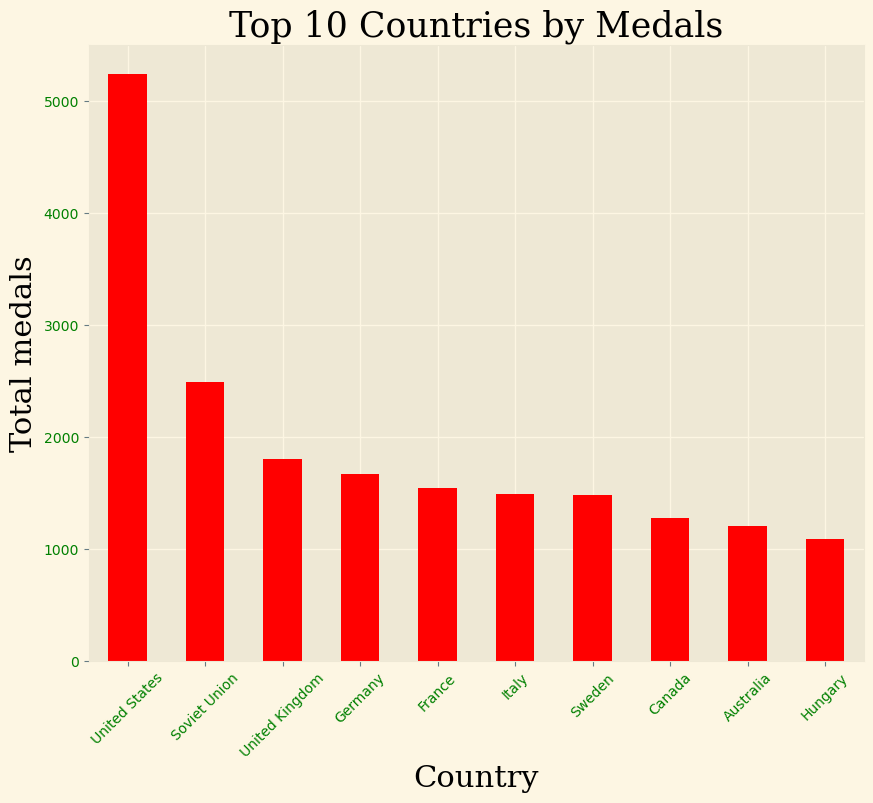

In [35]:
plt.style.use("Solarize_Light2")
Top_10.plot(kind = "bar",figsize=(10,8),color="red")
font1 = {"family":"serif","color":"black","size":25}
font2 = {"family":"serif","color":"black","size":22}
font3 = {"family":"serif","color":"black","size":22}
plt.title("Top 10 Countries by Medals",fontdict=font1)
plt.xticks( rotation =45,color="green")
plt.yticks(color="green")
plt.xlabel("Country",fontdict=font2)
plt.ylabel("Total medals",fontdict=font3)
plt.show()

In [36]:
Olympics_Top_10 = Olympics[Olympics.Country.isin(Top_10.index)]# Filtering top 10 countries data
Olympics_Top_10

,Editions,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


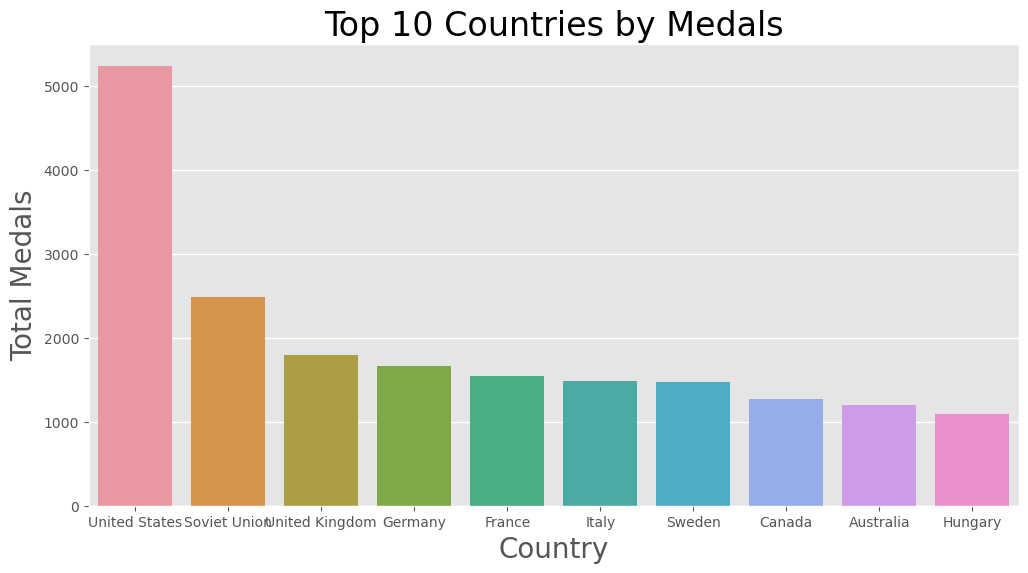

In [37]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
sns.countplot(data = Olympics_Top_10, x = "Country",order = Top_10.index)
plt.title("Top 10 Countries by Medals",fontsize=24,color="black")
plt.xlabel("Country",fontsize=20)
plt.ylabel("Total Medals",fontsize=20)
plt.show()

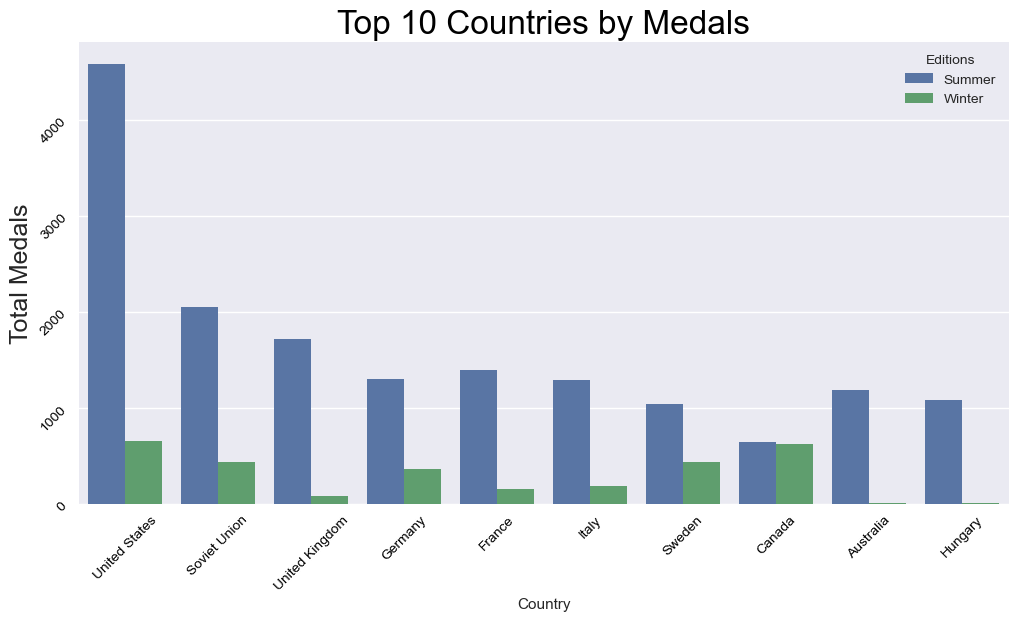

In [38]:
plt.style.use("seaborn")
plt.figure(figsize=(12,6))
sns.countplot(data = Olympics_Top_10, x = "Country",hue="Editions",order = Top_10.index)
plt.title("Top 10 Countries by Medals",fontsize=24,color="black")
#plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Medals",fontsize=18)
plt.xticks(rotation=45,color="black")
plt.yticks(rotation=45,color="black")
plt.show()

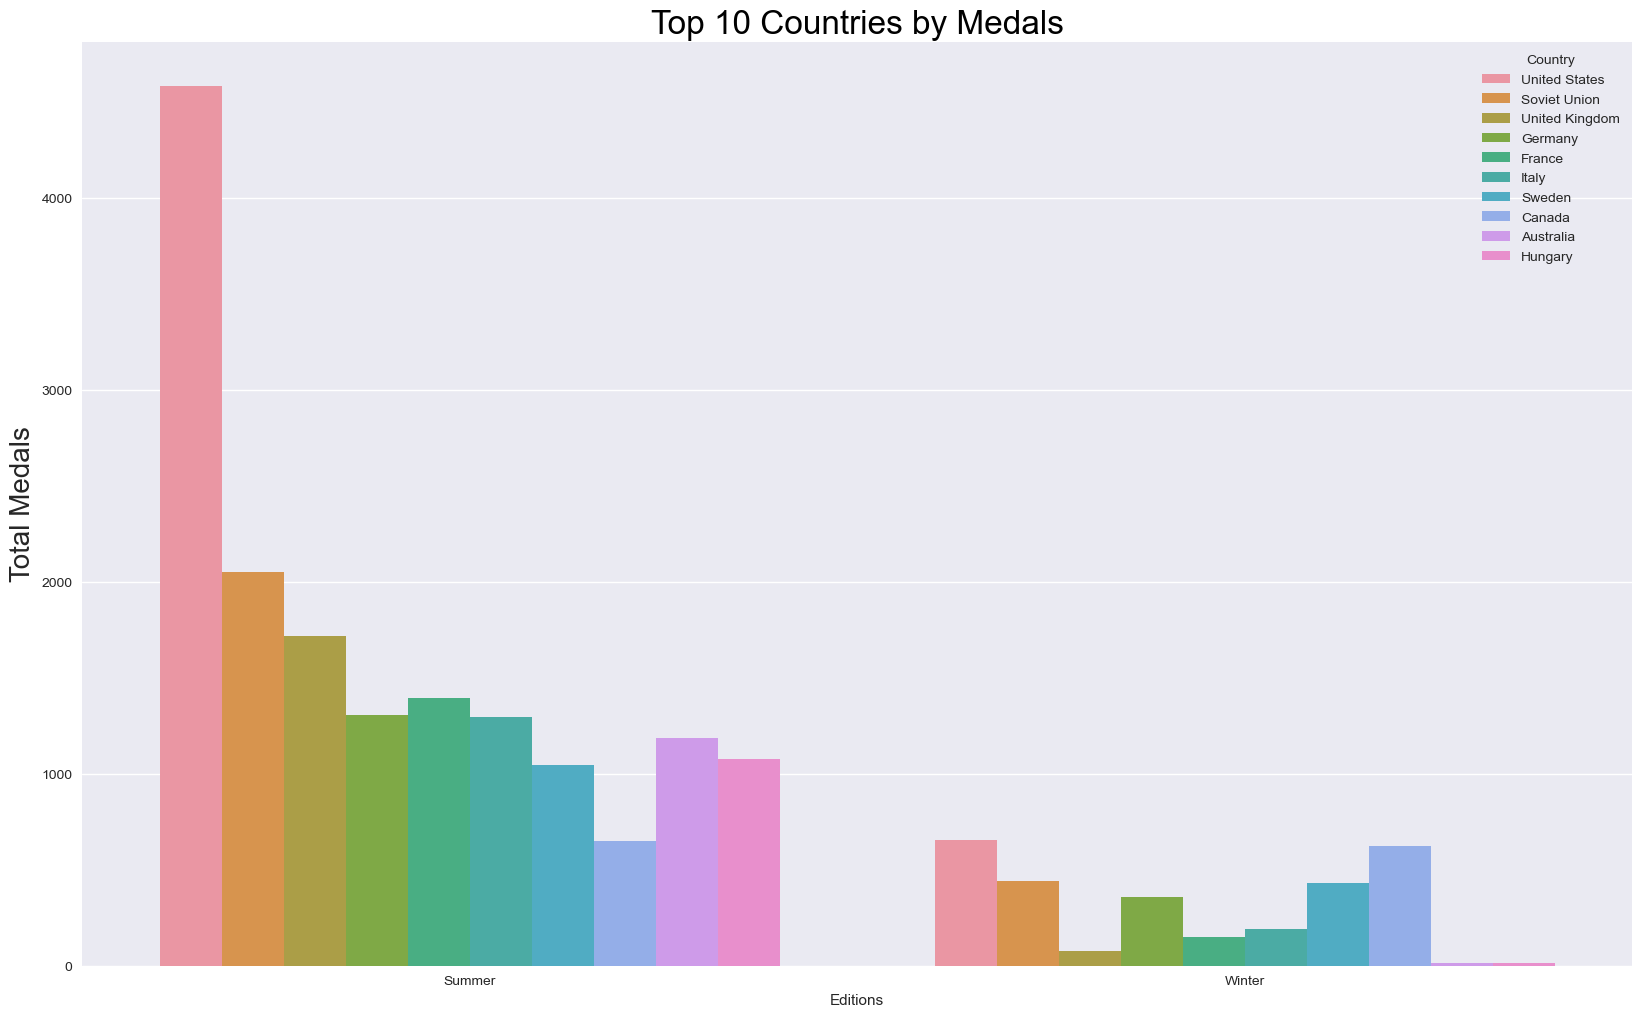

In [39]:
plt.figure(figsize=(20,12))
sns.countplot(data = Olympics_Top_10, x = "Editions",hue="Country",hue_order=Top_10.index)
plt.title("Top 10 Countries by Medals",fontsize=24,color="black")
plt.ylabel("Total Medals",fontsize=20)
plt.show()

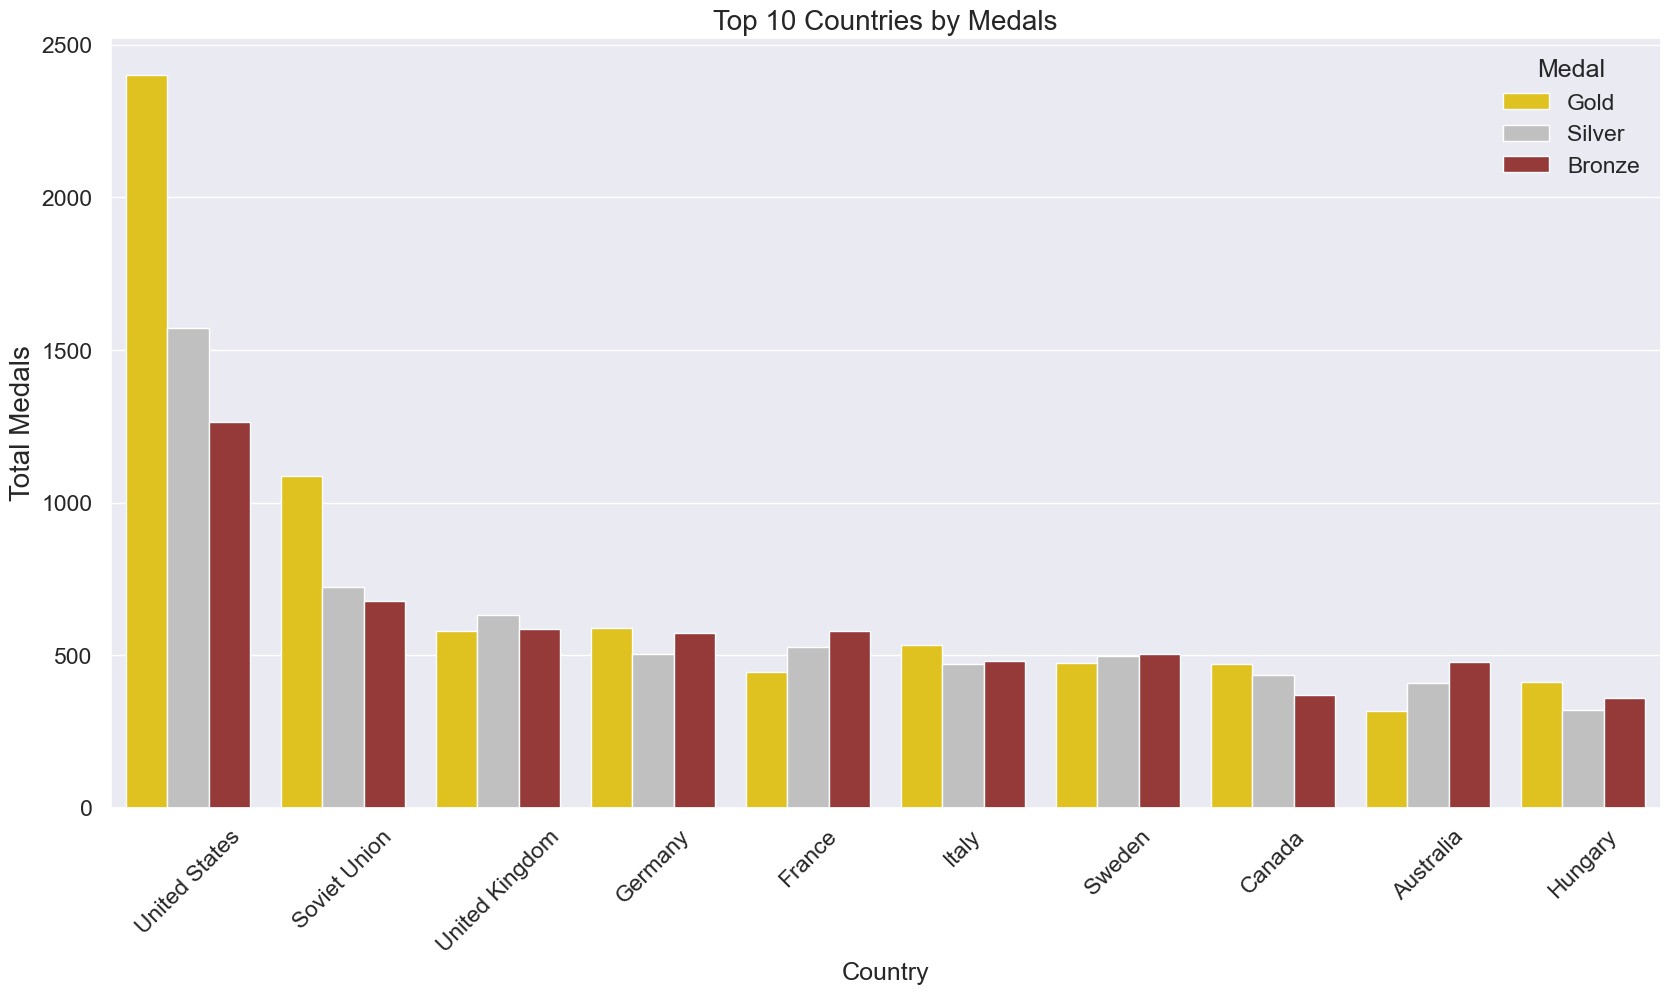

In [40]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = Olympics_Top_10, x = "Country", hue = "Medal", order = Top_10.index,
              hue_order = ["Gold", "Silver", "Bronze"], palette = ["gold", "silver", "brown"])
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.xticks(rotation= 45)
plt.ylabel("Total Medals",fontsize=20)
plt.show()

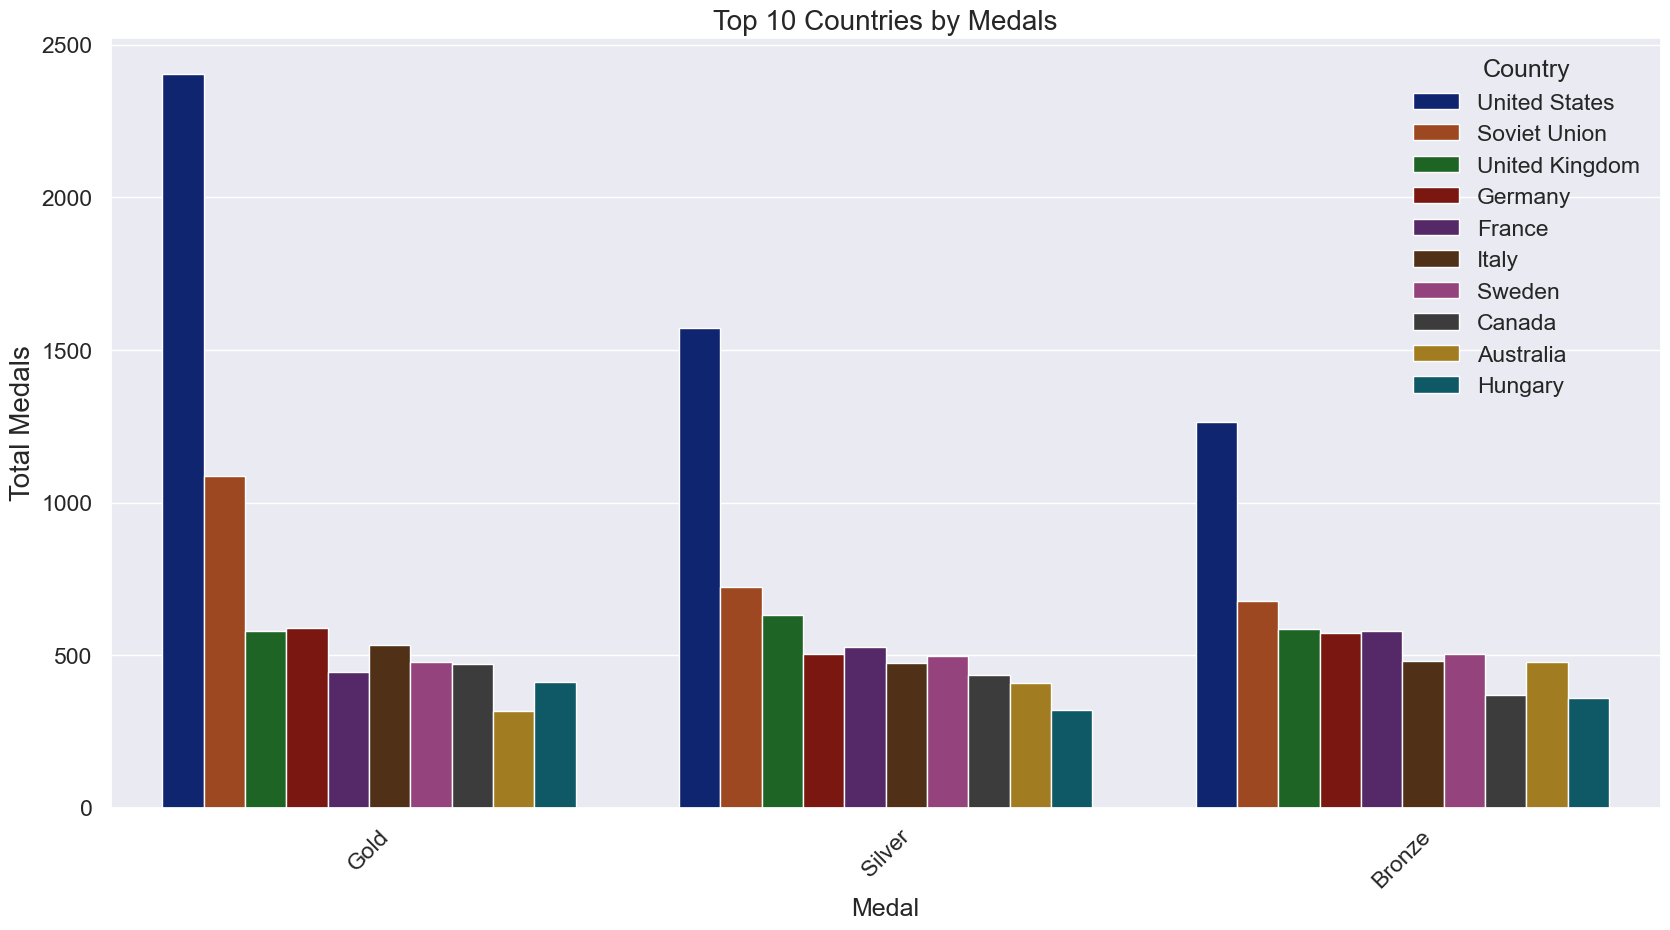

In [41]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = Olympics_Top_10, x = "Medal", hue = "Country", 
              order = ["Gold", "Silver", "Bronze"], hue_order= Top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.xticks(rotation= 45)
plt.ylabel("Total Medals",fontsize=20)
plt.show()

## Now lets check the impact of GDP, Population and Politics matter 

In [42]:
Olympics

,Editions,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [43]:
Medals_per_country = pd.crosstab(index=Olympics.Country,columns=Olympics.Medal,margins=True,margins_name="Total")

In [44]:
Medals_per_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29
...,...,...,...,...
West Indies Federation,5,0,0,5
Yugoslavia,119,180,143,442
Zambia,1,1,0,2


In [45]:
Medals_per_country.drop("Total",axis=0,inplace=True)
Medals_per_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29
...,...,...,...,...
West Germany,227,191,166,584
West Indies Federation,5,0,0,5
Yugoslavia,119,180,143,442


In [46]:
Medals_per_country = Medals_per_country[["Total","Gold","Silver","Bronze"]].sort_values(by=["Total","Gold","Silver","Bronze"],ascending=False)
Medals_per_country

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
...,...,...,...,...
Iraq,1,0,0,1
Macedonia,1,0,0,1
Mauritius,1,0,0,1


In [47]:
dic

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [48]:
Medals_per_country=Medals_per_country.merge(dic,how="left",left_on="Country",right_on="Country").set_index("Country").drop(columns="Code")

In [49]:
Medals_per_country.head(5)

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102


In [50]:
Olympics["Games"] = Olympics.apply(lambda x: str(x.Year)+ " "+ x.City,axis=1)
Olympics

,Editions,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [51]:
Medals_per_country["Total_Games"] = Olympics.groupby("Country").apply(lambda x: x.Games.nunique())
Medals_per_country

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,65138232.0,43875.969614,42
Germany,1665,589,504,572,81413145.0,41313.313995,25
France,1548,444,526,578,66808385.0,36205.568102,47
...,...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388,1
Macedonia,1,0,0,1,2078453.0,4852.657848,1
Mauritius,1,0,0,1,1262605.0,9252.110724,1


In [52]:
Medals_per_country.rank(ascending=False)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,7.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,3.0,4.0,3.0,3.0,20.0,13.0,10.0
Germany,4.0,3.0,5.0,5.0,15.0,18.0,19.0
France,5.0,8.0,4.0,4.0,19.0,22.0,3.0
...,...,...,...,...,...,...,...
Iraq,133.5,122.5,135.0,114.5,34.0,76.0,131.0
Macedonia,133.5,122.5,135.0,114.5,108.0,77.0,131.0
Mauritius,133.5,122.5,135.0,114.5,115.0,54.0,131.0


# Statistical Analysis and Hypothesis Testing with scipy

Now Checking whether __GDP__ (Standard of Living), __Total_Games__(Political Stability measure) and __Population (Size)__ have an __effect__ on Total Medals or not 

In [53]:
Medals_per_country.drop(columns=["Gold","Silver","Bronze"],axis=1,inplace=True)
Medals_per_country

,Total,Population,GDP,Total_Games
Country,,,,
United States,5238,321418820.0,56115.718426,48
Soviet Union,2489,NaN,NaN,18
United Kingdom,1799,65138232.0,43875.969614,42
Germany,1665,81413145.0,41313.313995,25
France,1548,66808385.0,36205.568102,47
...,...,...,...,...
Iraq,1,36423395.0,4943.760388,1
Macedonia,1,2078453.0,4852.657848,1
Mauritius,1,1262605.0,9252.110724,1


In [54]:
Medals_per_country.corr(method="pearson")

,Total,Population,GDP,Total_Games
Total,1.000000,0.206606,0.437131,0.712917
Population,0.206606,1.000000,-0.089976,0.123700
GDP,0.437131,-0.089976,1.000000,0.563540
Total_Games,0.712917,0.123700,0.563540,1.000000


In [55]:
Medals_per_country.corr(method="spearman")

,Total,Population,GDP,Total_Games
Total,1.000000,0.419755,0.458478,0.927611
Population,0.419755,1.000000,-0.239097,0.402098
GDP,0.458478,-0.239097,1.000000,0.498056
Total_Games,0.927611,0.402098,0.498056,1.000000


In [56]:
import scipy.stats as stats

__Hypothesis 1:__ There is no relationship between Total Medals and Population

In [57]:
stats.spearmanr(Medals_per_country.Total,Medals_per_country.Population,nan_policy="omit")

SignificanceResult(statistic=0.41975527887063924, pvalue=8.132240868116897e-07)

In [58]:
r,p_value = stats.spearmanr(Medals_per_country.Total,Medals_per_country.Population,nan_policy="omit")

In [59]:
r

0.41975527887063924

In [60]:
round(p_value)

0

__Reject Hypothesis 1 ->__ There is a significant (positive) relationship between Total Medals and Population

__Hypothesis 2:__ There is no relationship between Total Medals and GDP

In [61]:
r,p_value = stats.spearmanr(Medals_per_country.Total,Medals_per_country.GDP,nan_policy="omit")

In [62]:
r

0.45847787983426685

In [63]:
round(p_value)

0

__Reject Hypothesis 2 ->__ There is a significant (positive) relationship between Total Medals and GDP

__Hypothesis 3:__ There is no relationship between Total Medals and Total_Games

In [64]:
r,p_value = stats.spearmanr(Medals_per_country.Total,Medals_per_country.Total_Games,nan_policy="omit")

In [65]:
r

0.9276106841243015

In [66]:
round(p_value)

0

__Reject Hypothesis 3 ->__ There is a significant (positive) relationship between Total Medals and Total_Games

## Now lets understand data by heatmap 

In [67]:
Men_Women = pd.crosstab(Olympics.Country,Olympics.Gender)
Men_Women

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [68]:
Summer_Winter = pd.crosstab(Olympics.Country,Olympics.Editions)
Summer_Winter

Editions,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [69]:
Editions_Gender = pd.concat([Men_Women,Summer_Winter],axis=1)
Editions_Gender

,Men,Women,Summer,Winter
Country,,,,
Afghanistan,2,0,2,0
Algeria,12,3,15,0
Argentina,187,72,259,0
Armenia,11,0,11,0
Australasia,27,2,29,0
...,...,...,...,...
West Germany,450,134,490,94
West Indies Federation,5,0,5,0
Yugoslavia,379,63,435,7


In [70]:
Editions_Gender["Total"] = Editions_Gender.Summer + Editions_Gender.Winter
Editions_Gender

,Men,Women,Summer,Winter,Total
Country,,,,,
Afghanistan,2,0,2,0,2
Algeria,12,3,15,0,15
Argentina,187,72,259,0,259
Armenia,11,0,11,0,11
Australasia,27,2,29,0,29
...,...,...,...,...,...
West Germany,450,134,490,94,584
West Indies Federation,5,0,5,0,5
Yugoslavia,379,63,435,7,442


In [71]:
Editions_Gender.sort_values("Total",inplace=True,ascending=False)
Editions_Gender

,Men,Women,Summer,Winter,Total
Country,,,,,
United States,3618,1620,4585,653,5238
Soviet Union,1807,682,2049,440,2489
United Kingdom,1470,329,1720,79,1799
Germany,1119,546,1305,360,1665
France,1351,197,1396,152,1548
...,...,...,...,...,...
Iraq,1,0,1,0,1
Senegal,1,0,1,0,1
Macedonia,1,0,1,0,1


In [72]:
ranks = Editions_Gender.rank(ascending=False,method="average")
ranks

,Men,Women,Summer,Winter,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,2.0,2.0,4.0,2.0
United Kingdom,3.0,11.0,3.0,19.0,3.0
Germany,7.0,4.0,5.0,7.0,4.0
France,4.0,16.5,4.0,14.0,5.0
...,...,...,...,...,...
Iraq,127.0,120.0,132.5,95.5,133.5
Senegal,127.0,120.0,132.5,95.5,133.5
Macedonia,127.0,120.0,132.5,95.5,133.5


In [73]:
top_50 = ranks.head(50)

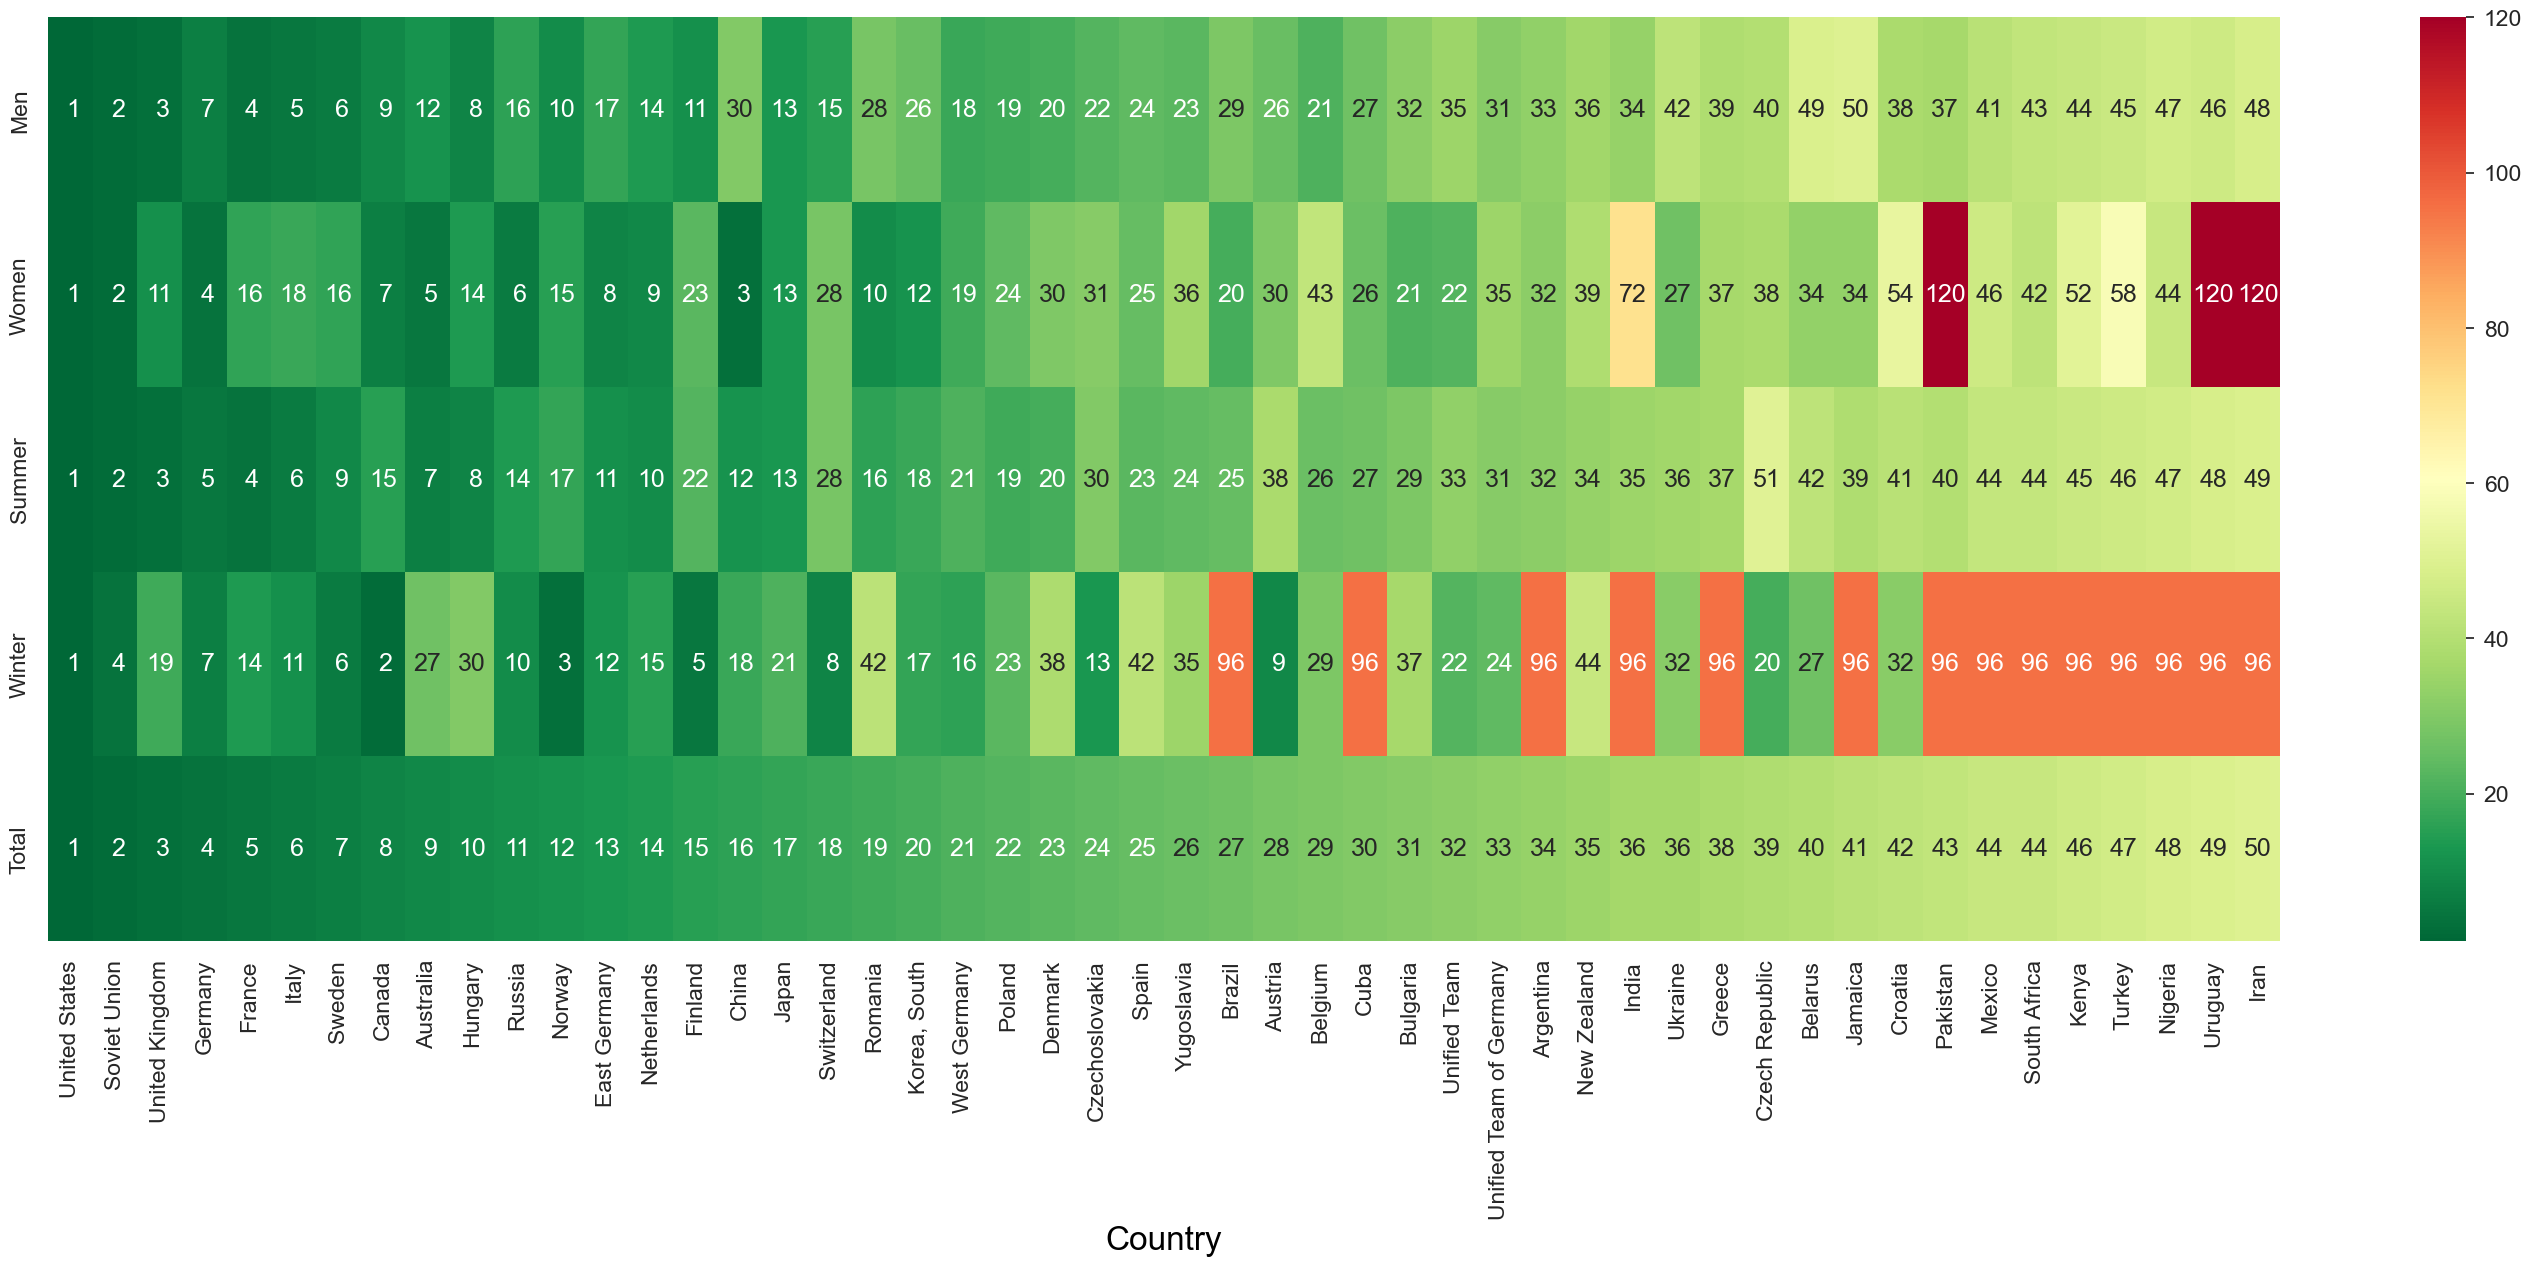

In [74]:
plt.figure(figsize=(36,12))
plt.xlabel("Country",color="black",fontsize=24)
sns.heatmap(top_50.T,cmap='RdYlGn_r',annot=True,fmt="2.0f")
plt.show()

<h2 align='center'> Thank You </h2>  